In [1]:
import pispec as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection

def sientific_notation(p_value):
    str_xinj_asked = str("%.3e"%p_value)
    if p_value>1.:
        num = float(str_xinj_asked.split('e+')[0])
        exp = int(str_xinj_asked.split('e+')[1])
        text_gamma_str1 = r'$%.2f \times 10^{%d}$'% (num,exp)
    if p_value<1.:
        num = float(str_xinj_asked.split('e-')[0])
        exp = int(str_xinj_asked.split('e-')[1])
        text_gamma_str1 = r'$%.2f \times 10^{-%d}$'% (num,exp)
    return text_gamma_str1

no


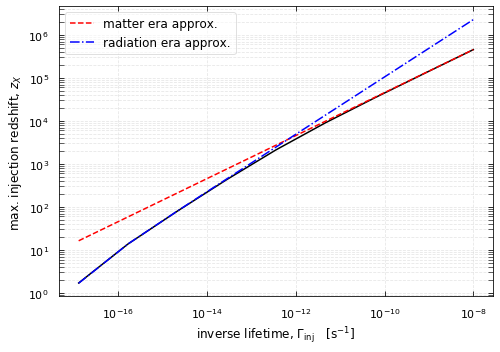

In [2]:
path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 10
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)


x_min = 1.e-1
x_max = 5.e6
ymin = 1.e-3
ymax = 2e0

ngamma = N_Gamma_inj 



#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 12
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel("max. injection redshift, "+ r'$z_X$',size=title_size)
ax.set_xlabel("inverse lifetime, "+r"$\Gamma_\mathrm{inj}\quad[\mathrm{s^{-1}}]$",size=title_size)
ax.yaxis.set_label_coords(-.08,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


# ax.axvspan(800., 1500, facecolor='red', alpha=0.1)
# ax.text(0.52, 0.1, 'recombination', transform=ax.transAxes,color='k',rotation=90)

# ax.axvspan(3.e5, x_max, facecolor='orange', alpha=0.3)
# ax.text(0.9, 1.02, r'$\mu$-era', fontsize=9,
#         transform=ax.transAxes,color='k',rotation=0)

# ax.axvspan(5e4, 3e5, facecolor='orange', alpha=0.2)
# ax.text(0.69, 1.02, r'$\mu$-$y$ transition', fontsize=9,transform=ax.transAxes,color='k',
#         rotation=0)

# ax.axvspan(x_min, 5e4, facecolor='orange', alpha=0.1)
# ax.text(0.4, 1.02, r'$y$-era', fontsize=9, transform=ax.transAxes,color='k',rotation=0)



# ax.axvspan(6., 25, facecolor='red', alpha=0.2)
# ax.text(0.24, 0.1, 'reionization', transform=ax.transAxes,color='k',rotation=90)



color=iter(cm.viridis(np.linspace(1,0,ngamma)))



ct = pi.cosmotherm()
zX = []
gammas=[]
zX_rad = []
zX_mat = []
for Gamma_asked in Gamma_values:

    ct.ct_Gamma_dec = Gamma_asked
    cosmo = pi.cosmo()
    try:
        zX.append(pi.injection_redshift_zX(cosmo,ct))
        gammas.append(Gamma_asked)
        zX_rad.append(np.sqrt(Gamma_asked*cosmo.t_H0_in_s()/3./np.sqrt(cosmo.Omega_g())))
        zX_mat.append((2.*Gamma_asked*cosmo.t_H0_in_s()/5./np.sqrt(cosmo.Omega_m()))**(2./3.)-1.)
    except:
        print('no')

ax.plot(gammas,zX,c='k')
ax.plot(gammas,zX_rad,c='r',ls='--',label='matter era approx.')
ax.plot(gammas,zX_mat,c='b',ls='-.',label='radiation era approx.')
    
ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 12)
ax.loglog()

fig.tight_layout()
plt.savefig(path_to_figures + '/spectra_for_paper_zX.pdf')
plt.show()
plt.close(fig)

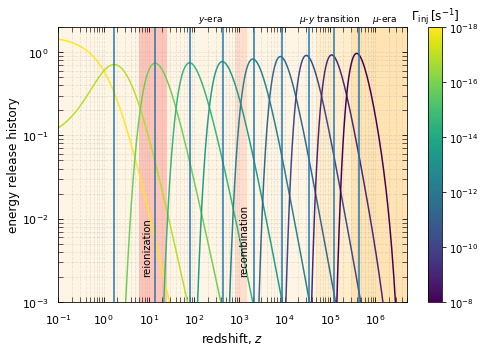

In [3]:
path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 10
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)


x_min = 1.e-1
x_max = 5.e6
ymin = 1.e-3
ymax = 2e0

ngamma = N_Gamma_inj 



#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 12
legend_size = 25
handle_length = 1.5




ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel("redshift, "+ r'$z$',size=title_size)
ax.set_ylabel("energy release history",size=title_size)
ax.yaxis.set_label_coords(-.11,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


ax.axvspan(800., 1500, facecolor='red', alpha=0.1)
ax.text(0.52, 0.1, 'recombination', transform=ax.transAxes,color='k',rotation=90)

ax.axvspan(3.e5, x_max, facecolor='orange', alpha=0.3)
ax.text(0.9, 1.02, r'$\mu$-era', fontsize=9,
        transform=ax.transAxes,color='k',rotation=0)

ax.axvspan(5e4, 3e5, facecolor='orange', alpha=0.2)
ax.text(0.69, 1.02, r'$\mu$-$y$ transition', fontsize=9,transform=ax.transAxes,color='k',
        rotation=0)

ax.axvspan(x_min, 5e4, facecolor='orange', alpha=0.1)
ax.text(0.4, 1.02, r'$y$-era', fontsize=9, transform=ax.transAxes,color='k',rotation=0)



ax.axvspan(6., 25, facecolor='red', alpha=0.2)
ax.text(0.24, 0.1, 'reionization', transform=ax.transAxes,color='k',rotation=90)



color=iter(cm.viridis(np.linspace(1,0,ngamma)))



args = {}
args['param_values_array'] = Gamma_values
args['param_name'] = 'photon injection Gamma_dec'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=1
R = ct.run_cosmotherm_parallel(**args)

for r,Gamma_asked in zip(R,Gamma_values):

    col = next(color)
    slabel = r"$\Gamma_\mathrm{inj} = $"+sientific_notation(Gamma_asked)
    ax.plot(r["z"],r["dDrho_rhodt_rel"],c=col,label=slabel)
    
    ct.ct_Gamma_dec = Gamma_asked
    cosmo = pi.cosmo()
    try:
        zX = pi.injection_redshift_zX(cosmo,ct)
        ax.axvline(zX)
    except:
        zX = 0.

ax.loglog()
my_cmap = cm.viridis
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm)
cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')

fig.tight_layout()
plt.savefig(path_to_figures + '/spectra_for_paper_drho_rho.pdf')
plt.show()
plt.close(fig)

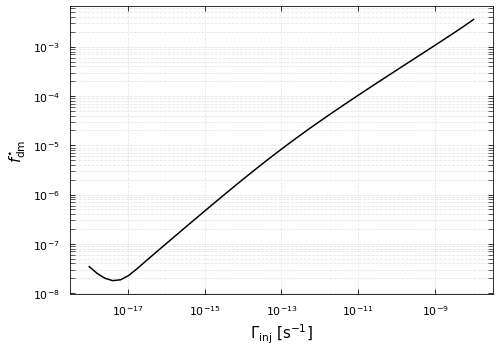

In [29]:
path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 50
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)


x_min = 1.e-2
x_max = 5.e6
ymin = 1.e-3
ymax = 2e0

ngamma = N_Gamma_inj 



#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 15
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(r'$f_\mathrm{dm}^{\star}$',size=title_size)
ax.set_xlabel(r"$\Gamma_\mathrm{inj}\,\,[\mathrm{s^{-1}}]$",size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



color=iter(cm.viridis(np.linspace(1,0,ngamma)))



args = {}
args['param_values_array'] = Gamma_values
args['param_name'] = 'photon injection Gamma_dec'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=1
R = ct.run_cosmotherm_parallel(**args)

gamma = []
fdm =[]
for r,Gamma_asked in zip(R,Gamma_values):
    gamma.append(r['Gamma'])
    fdm.append(r['barI*Gamma_70/h70']**-1.*ct.ct_Drho_rho_dec*2.0593e-4)
ax.plot(gamma,fdm,c='k')


ax.loglog()
# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
# cbar = plt.colorbar(sm)
# cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
# cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
# cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')

fig.tight_layout()
plt.savefig(path_to_figures + '/spectra_for_paper_fdm_ct.pdf')
plt.show()
plt.close(fig)

In [17]:
'%.4e'%float(pi.rho_gamma_in_GeV_per_cm3(2.726))

'2.6076e-10'

In [19]:
'%.4e'%float(0.12*1.0537e-5/2.6076e-10)

'4.8491e+03'

In [24]:
2.6076e-10/1.0537e-5

2.474708171206226e-05

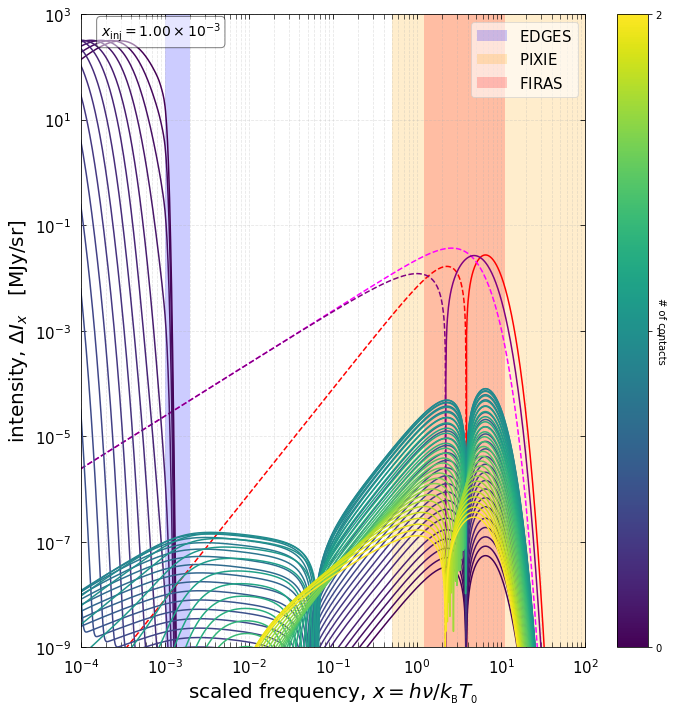

In [58]:
path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-17
Gamma_inj_max = 1e-8
N_Gamma_inj = 50
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)

xinj_asked = 1.e-3

x_min = 1.e-4
x_max = 1.e2
ymin = 1.e-9
ymax = 1e3

fig, ax1 = plt.subplots(1,1,figsize=(10,10))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5
my_cmap = cm.viridis
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))


ax =ax1


ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel("scaled frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_0}$',size=title_size)
ax.set_ylabel("intensity, "+r'$\Delta I_x \quad [\mathrm{MJy/sr}]$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=100))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=100))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*0.1,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.axvspan(1.e-3, 2e-3, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
ax.axvspan(0.5, 105, facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
ax.axvspan(1.2, 11.2, facecolor='red', alpha=0.2,label=r'$\mathrm{FIRAS}$')


ngamma = 50
cb = cm.viridis(np.linspace(0,1,ngamma))
color=iter(cm.viridis(np.linspace(0,1,ngamma)))

x_asked = np.logspace(np.log10(x_min),np.log10(x_max),1000)




xinj_ct_for_plot = xinj_asked
    
Y = pi.GetYSpecDistAtTandX(pi.firas.firas_y_fixsen_1996,pi.firas_T0_bf,x_asked)
plt.plot(x_asked,Y,c='r')
plt.plot(x_asked,-Y,c='r',ls='--')

MU = pi.GetMuSpecDistAtTandX(pi.firas.firas_mu_fixsen_1996,pi.firas_T0_bf,x_asked)
plt.plot(x_asked,MU,c='magenta')
plt.plot(x_asked,-MU,c='magenta',ls='--')

MU_chluba = pi.GetMuSpecDistAtTandX_chluba(pi.firas.firas_mu_fixsen_1996,pi.firas_T0_bf,x_asked)
plt.plot(x_asked,MU_chluba,c='purple')
plt.plot(x_asked,-MU_chluba,c='purple',ls='--')

xs = []
ys = []
gammas = np.logspace(-16.99,-8.1,ngamma)
for Gamma_asked in gammas:
    
    S = pi.GetSpectra(Gamma_asked,xinj_asked,x_asked)
    plt.plot(S["x"],np.abs(S["DI"])/S["finj"],c=next(color))
   

my_cmap = cm.viridis
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm,ticks=[0.,0.5,1.])
cbar.ax.set_yticklabels(['0','1','2'])
cbar.set_label('# of contacts', rotation=270)
plt.loglog()

str_xinj_asked = str("%.3e"%xinj_asked)
if xinj_asked>1.:
    num = float(str_xinj_asked.split('e+')[0])
    exp = int(str_xinj_asked.split('e+')[1])
    text_gamma_str1 = r'$x_\mathrm{inj}= %.2f \times 10^{%d}$'% (num,exp)
if xinj_asked<1.:
    num = float(str_xinj_asked.split('e-')[0])
    exp = int(str_xinj_asked.split('e-')[1])
    text_gamma_str1 = r'$x_\mathrm{inj}= %.2f \times 10^{-%d}$'% (num,exp)


ax.text(0.04, 0.99, text_gamma_str1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

legend1 = ax1.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 15)
plt.grid( b=True, which="both", alpha=0.3, linestyle='--')
fig.tight_layout()
str_x = str("%.3e"%xinj_ct_for_plot)
#plt.savefig(path_to_figures + '/spectra_for_paper_xinj_' + str_x +'.pdf')
plt.show()
#plt.close(fig)

[[<matplotlib.axes._subplots.AxesSubplot object at 0xb23b974d0>


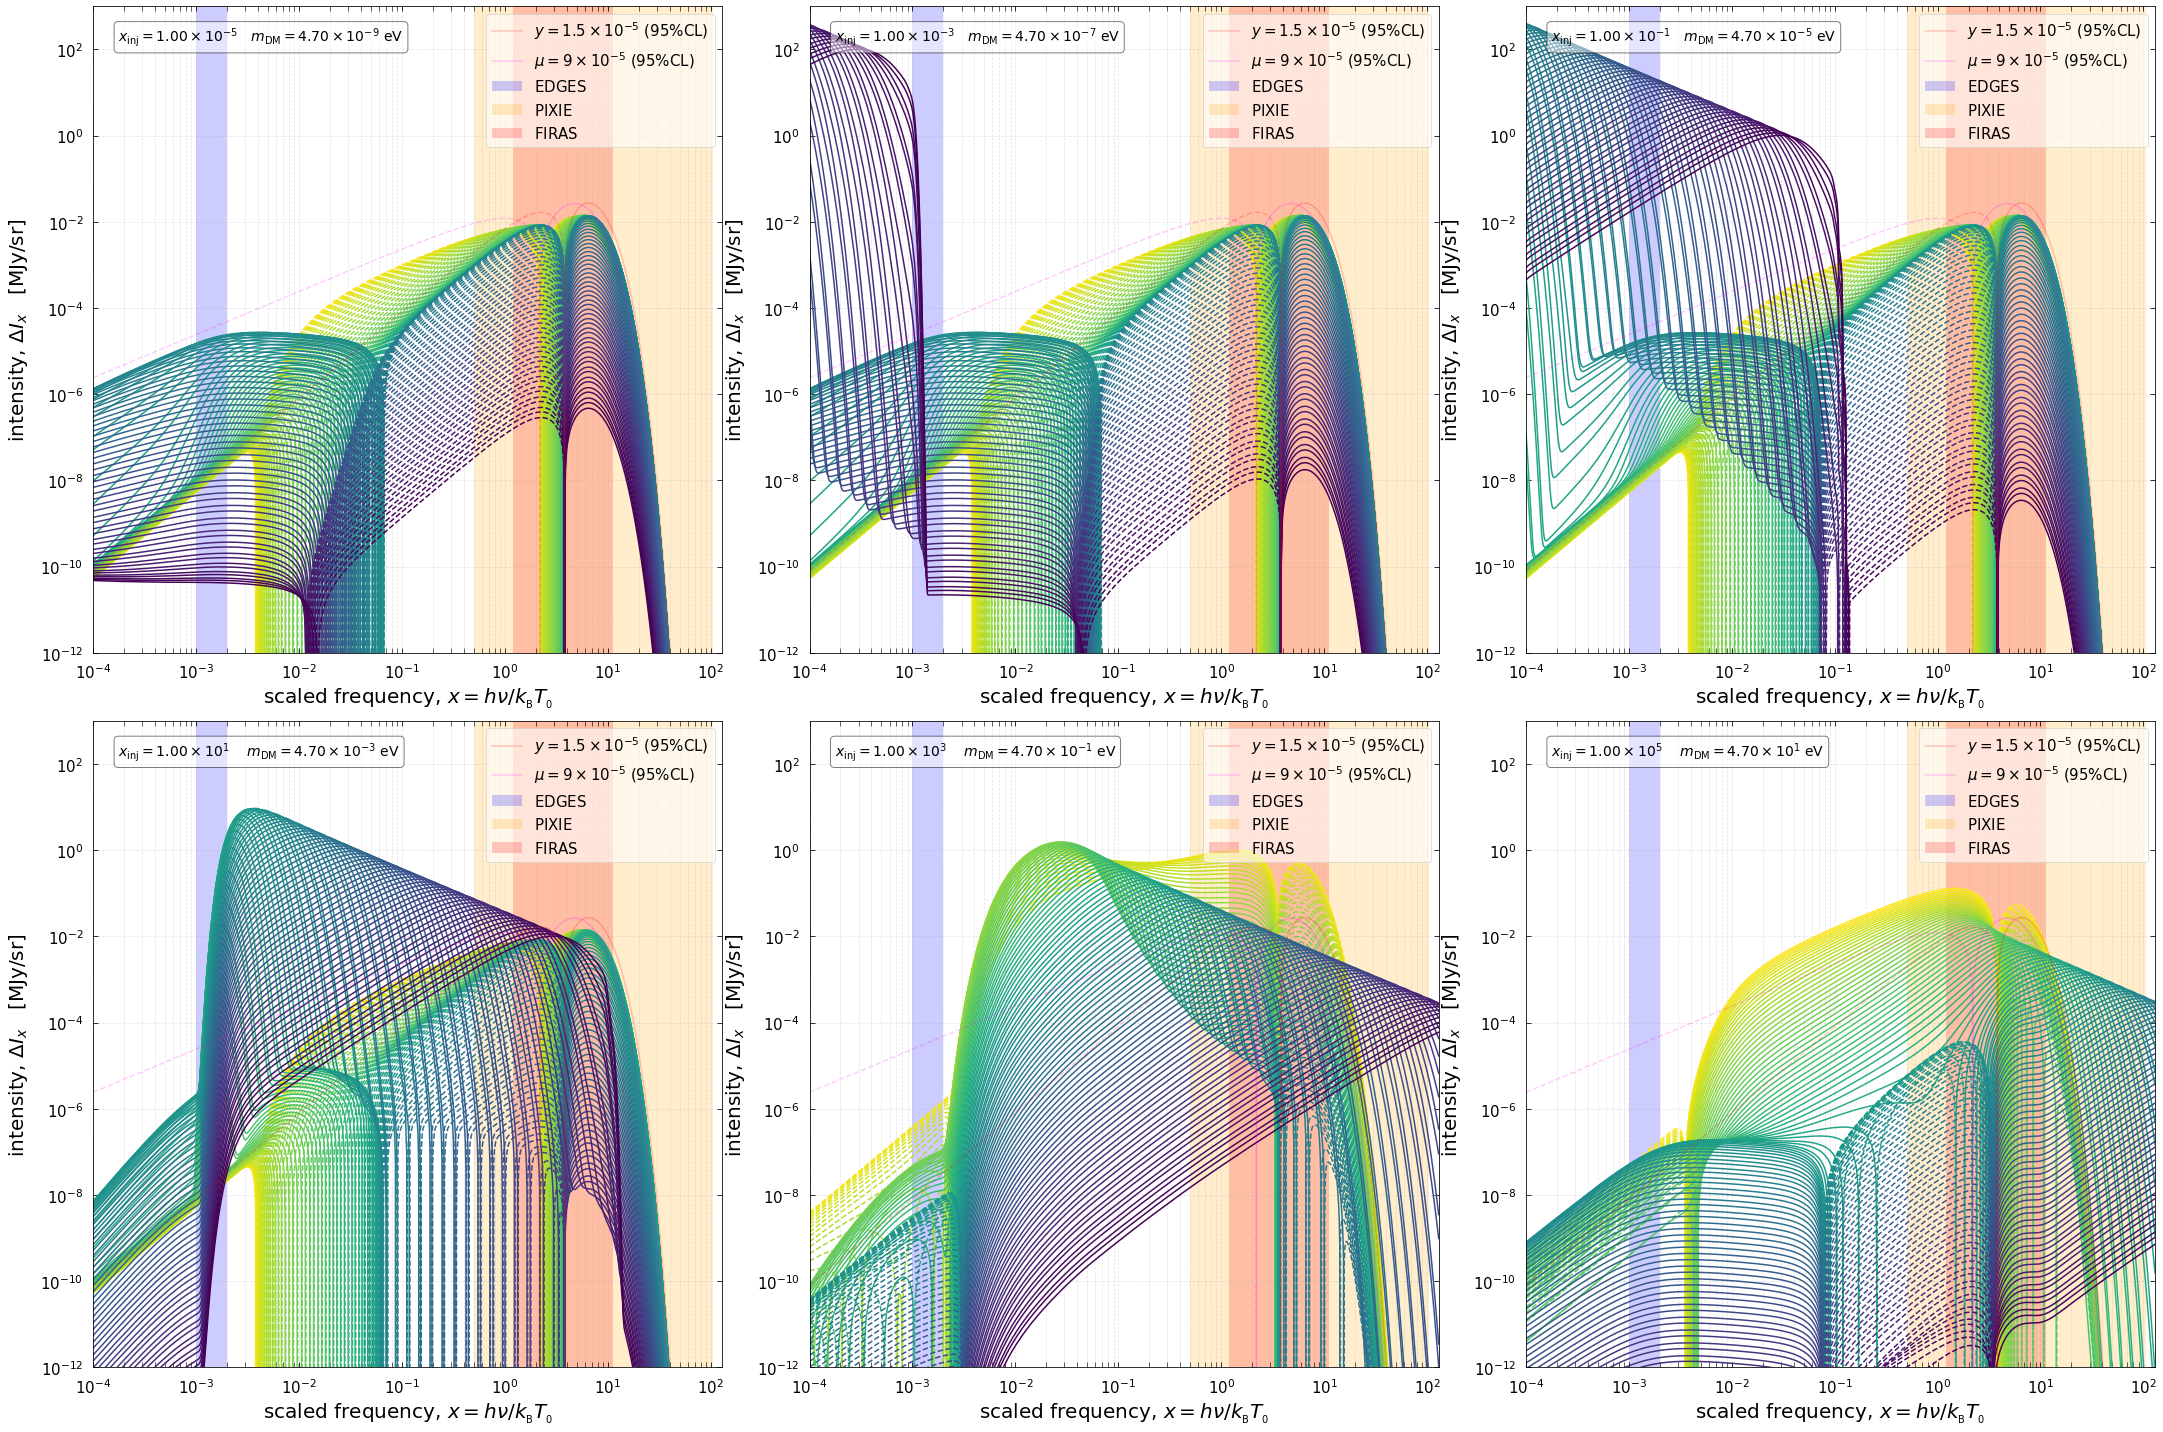

In [90]:
path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-17
Gamma_inj_max = 1e-8
N_Gamma_inj = 50
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)
xinj_to_mass = 4.698e-4 #in ev
xinj_asked_array = [1.e-5,1e-3,1e-1,1e1,1e3,1e5]

x_min = 1.e-4
x_max = 1.3e2
ymin = 1.e-12
ymax = 1e3

ngamma = 100


fig, ax_array = plt.subplots(2,3,figsize=(30,20))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

print(ax_array)
for (xinj_asked,ax) in zip(xinj_asked_array,ax_array.reshape(-1)):



    ax.set_xlim(x_min,x_max)
    ax.set_ylim(ymin,ymax)
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_xlabel("scaled frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_0}$',size=title_size)
    ax.set_ylabel("intensity, "+r'$\Delta I_x \quad [\mathrm{MJy/sr}]$',size=title_size)
    ax.yaxis.set_label_coords(-.1,0.5)


    ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
    ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

    plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
    plt.setp(ax.get_xticklabels(), fontsize=label_size)

    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
    ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
    locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                          numticks=12)
    ax.xaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_locator(locmin)
    ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax.axvspan(1.e-3, 2e-3, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    ax.axvspan(0.5, 105, facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2, 11.2, facecolor='red', alpha=0.2,label=r'$\mathrm{FIRAS}$')
    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
    #ax.grid(  which="both", alpha=0.3, linestyle='--')


    
    color=iter(cm.viridis(np.linspace(1,0,ngamma)))

    x_asked = np.logspace(np.log10(x_min),np.log10(x_max),1000)
    
    
    m_dec_in_ev = xinj_to_mass*xinj_asked
    str_m_dec_in_ev =  str("%.3e"%m_dec_in_ev)
    if m_dec_in_ev>1.:
        num = float(str_m_dec_in_ev.split('e+')[0])
        exp = int(str_m_dec_in_ev.split('e+')[1])
        text_mdec = r'$m_\mathrm{DM}=%.2f \times 10^{%d}\,\,\mathrm{eV}$'%(num,exp)
    if m_dec_in_ev<1.:
        num = float(str_m_dec_in_ev.split('e-')[0])
        exp = int(str_m_dec_in_ev.split('e-')[1])
        text_mdec = r'$m_\mathrm{DM}=%.2f \times 10^{-%d}\,\,\mathrm{eV}$'%(num,exp)

    
    xinj_ct_for_plot = xinj_asked
    


    for Gamma_asked in np.logspace(-16.99,-8.1,ngamma)[::-1]:

        S = pi.GetSpectra(Gamma_asked,xinj_asked,x_asked)
        col = next(color)
#         ax.plot(S["x"],S["DI"]/S["finj"],c=col)
#         ax.plot(S["x"],-S["DI"]/S["finj"],c=col,ls='--')
        ax.plot(S["x"],S["DI"],c=col)
        ax.plot(S["x"],-S["DI"],c=col,ls='--')
        #ax.plot(S["x"],np.abs(S["DI"]),c=next(color))


    ax.loglog()
    str_xinj_asked = str("%.3e"%xinj_asked)
    if xinj_asked>1.:
        num = float(str_xinj_asked.split('e+')[0])
        exp = int(str_xinj_asked.split('e+')[1])
        text_gamma_str1 = r'$x_\mathrm{inj}= %.2f \times 10^{%d}$'% (num,exp)
    if xinj_asked<1.:
        num = float(str_xinj_asked.split('e-')[0])
        exp = int(str_xinj_asked.split('e-')[1])
        text_gamma_str1 = r'$x_\mathrm{inj}= %.2f \times 10^{-%d}$'% (num,exp)
    
    text_gamma_str = '\t'.join((text_gamma_str1,text_mdec))


    ax.text(0.04, 0.97, text_gamma_str, transform=ax.transAxes, fontsize=14, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    
    Y = pi.GetYSpecDistAtTandX(pi.firas.firas_y_fixsen_1996,pi.firas_T0_bf,x_asked)
    ax.plot(x_asked,Y,c='r',alpha = 0.2,label = r'$y=1.5\times 10^{-5}$ (95%CL)')
    ax.plot(x_asked,-Y,c='r',ls='--',alpha = 0.2)

    MU_chluba = pi.GetMuSpecDistAtTandX_chluba(pi.firas.firas_mu_fixsen_1996,pi.firas_T0_bf,x_asked)
    ax.plot(x_asked,MU_chluba,c='magenta',alpha = 0.2,label=r'$\mu=9\times 10^{-5}$ (95%CL)')
    ax.plot(x_asked,-MU_chluba,c='magenta',ls='--',alpha = 0.2)
    
    legend1 = ax.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 15)
# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0., vmax=1.))

# # cbar = plt.colorbar(sm,ax=ax,ticks=[0.,0.5,1.])#,orientation='horizontal',anchor=(0.,0.),shrink=0.5)
# # cbar.ax.set_yticklabels(['0','1','2'])
# #cbar.set_label(r'$\Gamma_\mathrm{inj}$', rotation=0)
# cbar= fig.colorbar(sm, ax=ax_array.flat,orientation='horizontal')
# cbar.ax.set_xticks([0.,0.5,1.])
# cbar.ax.set_xticklabels(['0','1','2'])
# cbar.set_label(r'$\Gamma_\mathrm{inj}$', rotation=0)

fig.tight_layout()
str_x = str("%.3e"%xinj_ct_for_plot)
plt.savefig(path_to_figures + '/spectra_for_paper_xinj.pdf')
plt.show()
plt.close(fig)